In [1]:
import os
import tarfile
import urllib
import numpy as np

In [2]:
print(os.path)

<module 'ntpath' from 'D:\\Anaconda_Distribution\\envs\\newEnv\\lib\\ntpath.py'>


In [3]:
HOUSING_PATH='C:\\Users\\kiran_kalicherla\\Desktop\\Udemy_MachineLearning_Practice\\OREILLY_HandsOn\\datasets'
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_date(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = housing_path+"\\"+"housing.tgz"
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_trg = tarfile.open(tgz_path)
    housing_trg.extractall(path=housing_path)
    housing_trg.close()

In [5]:
###calling function to download the housing data
fetch_housing_date()

In [6]:
import pandas as pd

In [7]:
housing = pd.read_csv('datasets/housing.csv')

In [8]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

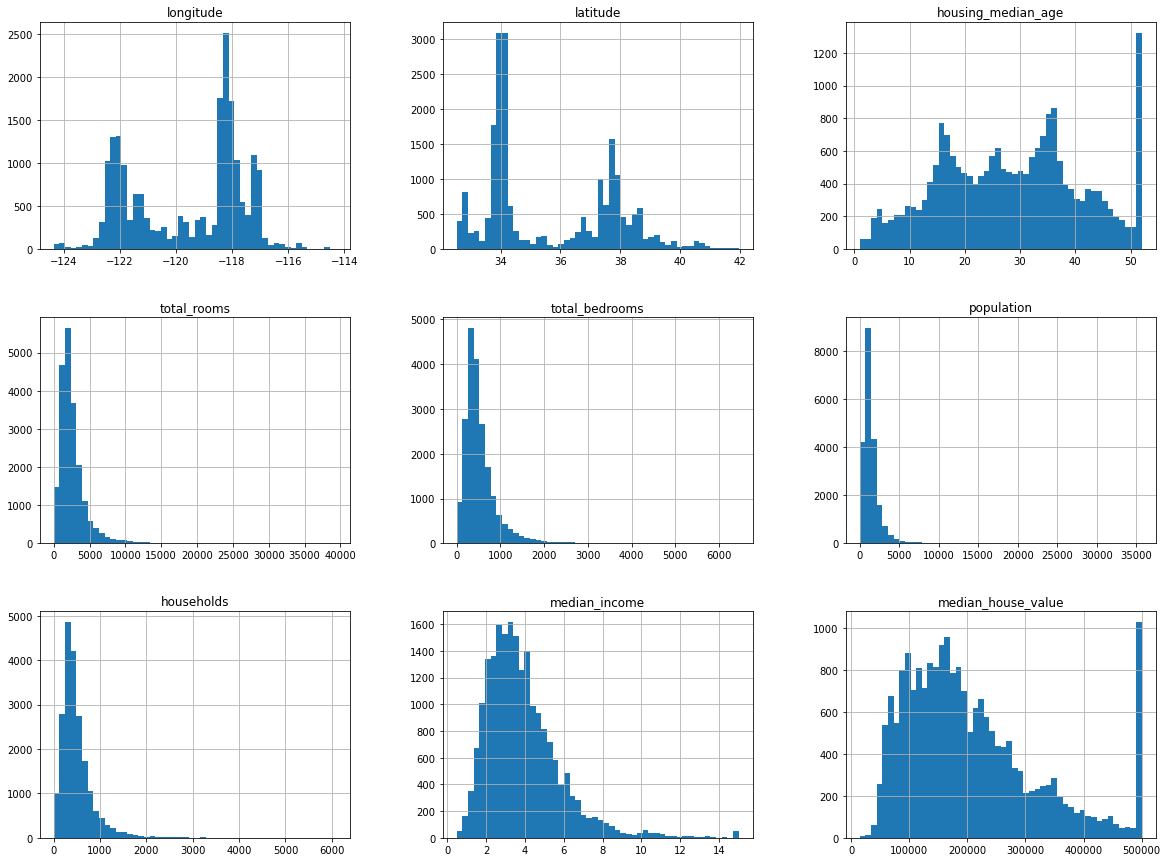

In [13]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
train_set,test_set = split_train_test(data=housing,test_ratio=0.2)

In [16]:
print(len(train_set))
print(len(test_set))
print(train_set.shape)
print(test_set.shape)

16512
4128
(16512, 10)
(4128, 10)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<AxesSubplot:>

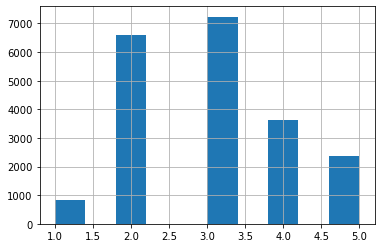

In [20]:
housing['income_cat'].hist()

In [21]:
#Stratified sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing['income_cat']):
    strart_train_set = housing.iloc[train_index]
    strart_test_set = housing.iloc[test_index]

In [22]:
strart_test_set['income_cat'].value_counts()/len(strart_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
for set_ in (strart_test_set,strart_train_set):
    set_.drop("income_cat",axis=1,inplace=True)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Exploring the data

In [24]:
housing = strart_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

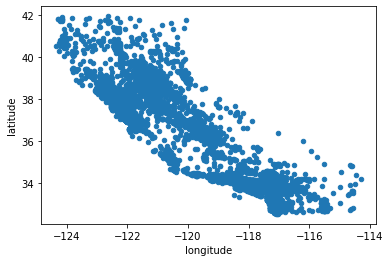

In [25]:
##Visualizing Geographical data
housing.plot(kind='scatter',x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

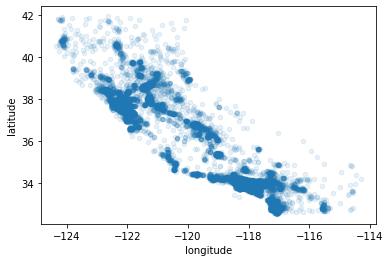

In [26]:
#Setting the alpha option 0.1 
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

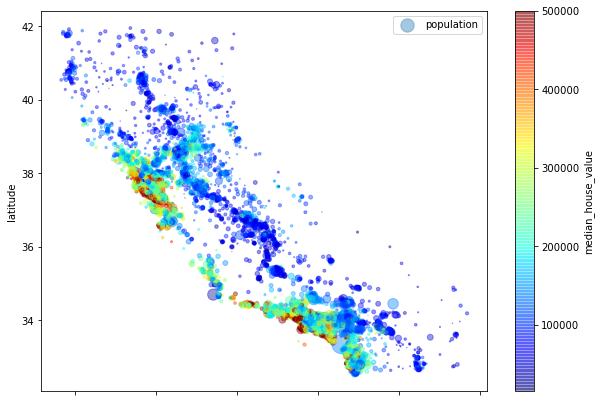

In [27]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s =housing['population']/100,label='population',figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

# Looking for Correlations

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

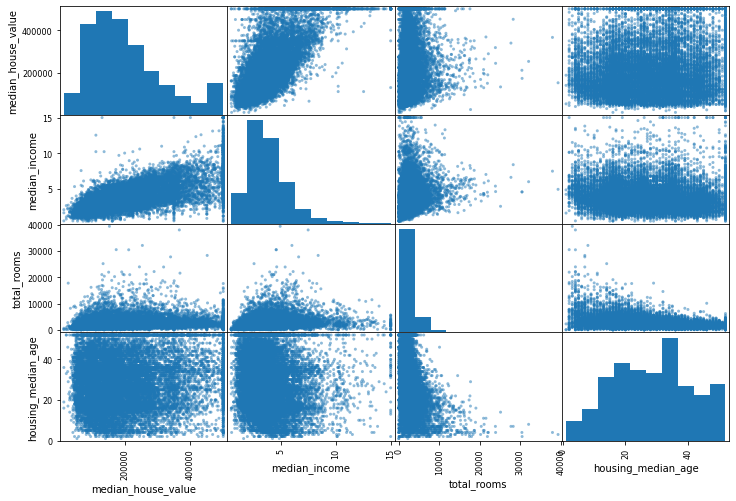

In [31]:
attributes =["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

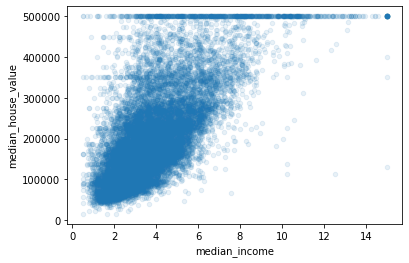

In [32]:
housing.plot(kind="scatter",y="median_house_value",x="median_income",alpha=0.1)

# Experimenting with Attribute combinations

# Prepare the data for Machine Learning Algorithm

In [33]:
housing = strart_train_set.drop("median_house_value",axis=1)
housing_labels = strart_train_set["median_house_value"].copy()

# Data Cleaning

In [34]:
#1.Get rid of the corresponding districts
#2. Get rid of the whole attribute
#3. Set the values to some value(Zero,the mean,the median etc.)

housing.dropna(subset=["total_bedrooms"]) # option1
housing.drop("total_bedrooms",axis=1) #option2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)

In [35]:
###Using Skiti Imputer , it can be done.  Before using Imputer remove text/categorical data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit_transform(housing_num)

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

# Handling Text and Categorical Attributes

In [38]:
housing_cat = housing[["ocean_proximity"]]

In [39]:
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [40]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [41]:
### Converting this categorical data to numerical using Ordinal Encoder from scikit learb
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
###Ordinal Encoding is not suitable for all cases. This will be ok for ordered categories such as "bad","average",excellent etc
##Implementing one hot encoder for this case
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

# Feature Scaling

In [46]:
#MinMaxScalar and StandardScalar

# Transformation Pipelines

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([("imputer",SimpleImputer(strategy="median")),
                            ("std_scalar",StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
###Column transformer to apply all transformations to the housing data
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),
                                    ("cat",OneHotEncoder(),cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

In [49]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

# Select and Train Model

In [50]:
#Training and evaludation on the Training set

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [52]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:",lin_reg.predict(some_data_prepared))
print("labels:", list(some_labels))

predictions: [211574.39523833 321345.10513719 210947.519838    61921.01197837
 192362.32961119]
labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions,housing_labels)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

69050.98178244587


In [55]:
###Now let's train this in DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)


DecisionTreeRegressor()

In [56]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


# Better evaluation using Cross-Validation

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

tree_mean_scores = np.sqrt(-scores)

In [58]:
tree_mean_scores

array([66968.65875983, 65723.11341873, 71990.50969686, 69245.54019739,
       68037.52680478, 74303.29334628, 67342.60567054, 69713.5029613 ,
       70530.69757107, 69511.04313379])

In [59]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [60]:
display_scores(tree_mean_scores)

Scores: [66968.65875983 65723.11341873 71990.50969686 69245.54019739
 68037.52680478 74303.29334628 67342.60567054 69713.5029613
 70530.69757107 69511.04313379]
Mean: 69336.64915605707
Standard Deviation: 2400.9573536269827


In [64]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,cv=10,scoring="neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67450.42057782 67329.50264436 68361.84864912 74639.88837894
 68314.56738182 71628.61410355 65361.14176205 68571.62738037
 72476.18028894 68098.06828865]
Mean: 69223.18594556303
Standard Deviation: 2657.268311277697


In [65]:
lin_scores

array([-4.54955924e+09, -4.53326193e+09, -4.67334235e+09, -5.57111294e+09,
       -4.66688012e+09, -5.13065836e+09, -4.27207885e+09, -4.70206808e+09,
       -5.25279671e+09, -4.63734690e+09])

In [66]:
####Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_pred = forest_reg.predict(housing_prepared)
forest_mean_err = mean_squared_error(housing_pred,housing_labels)
forest_rmse = np.sqrt(forest_mean_err)
display_scores(forest_rmse)

Scores: 18468.099022381244
Mean: 18468.099022381244
Standard Deviation: 0.0


In [67]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,cv=10,scoring="neg_mean_squared_error")
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47908.04252495 46281.10451796 49115.27189834 50095.52451338
 49182.91218439 53571.10432167 49067.40291377 50198.60684045
 51429.73724965 49566.46289546]
Mean: 49641.61698600105
Standard Deviation: 1851.3686338509826


# Fine Tune Your Model

## Grid Search

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parm_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
          {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

In [70]:
forest_reg = RandomForestRegressor()

In [71]:
grid_search = GridSearchCV(forest_reg,param_grid=parm_grid,cv=5,
                          scoring="neg_mean_squared_error",return_train_score=True)

In [72]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [74]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [75]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64817.970907383606 {'max_features': 2, 'n_estimators': 3}
55651.86319541663 {'max_features': 2, 'n_estimators': 10}
52804.80200267574 {'max_features': 2, 'n_estimators': 30}
60891.05836471061 {'max_features': 4, 'n_estimators': 3}
52992.90305728988 {'max_features': 4, 'n_estimators': 10}
50773.91702981411 {'max_features': 4, 'n_estimators': 30}
59213.79185493967 {'max_features': 6, 'n_estimators': 3}
52539.69576591925 {'max_features': 6, 'n_estimators': 10}
50520.42394777243 {'max_features': 6, 'n_estimators': 30}
57982.953560430375 {'max_features': 8, 'n_estimators': 3}
52233.01645528723 {'max_features': 8, 'n_estimators': 10}
50192.138164831405 {'max_features': 8, 'n_estimators': 30}
62290.21273168227 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54564.37627410817 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60354.679781543324 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53334.89043698247 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [76]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [77]:
feature_importances

array([1.11296450e-01, 9.89984370e-02, 5.00271130e-02, 3.01462529e-02,
       2.74962381e-02, 3.87703549e-02, 2.55424424e-02, 4.28362359e-01,
       5.92849845e-03, 1.77213306e-01, 1.16612259e-04, 1.76818071e-03,
       4.33375530e-03])